In [ ]:
#Support and Resistance Levels

In [11]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [12]:
#Setting parameters
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size = 14)

In [28]:
ticker = yfinance.Ticker('BTC-USD')

start_date = '2023-10-01'
end_date = '2024-01-10'

df = ticker.history(interval = '1d', start = start_date, end = end_date)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [14]:
df

,Date,Open,High,Low,Close
Date,,,,,
2021-11-01 00:00:00+00:00,18932.0,61320.449219,62419.003906,59695.183594,61004.406250
2021-11-02 00:00:00+00:00,18933.0,60963.253906,64242.792969,60673.054688,63226.402344
2021-11-03 00:00:00+00:00,18934.0,63254.335938,63516.937500,61184.238281,62970.046875
2021-11-04 00:00:00+00:00,18935.0,62941.804688,63123.289062,60799.664062,61452.230469
2021-11-05 00:00:00+00:00,18936.0,61460.078125,62541.468750,60844.609375,61125.675781
...,...,...,...,...,...
2024-01-05 00:00:00+00:00,19727.0,44192.980469,44353.285156,42784.718750,44162.691406
2024-01-06 00:00:00+00:00,19728.0,44178.953125,44227.632812,43475.156250,43989.195312
2024-01-07 00:00:00+00:00,19729.0,43998.464844,44495.570312,43662.230469,43943.097656


/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_1721/871483809.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


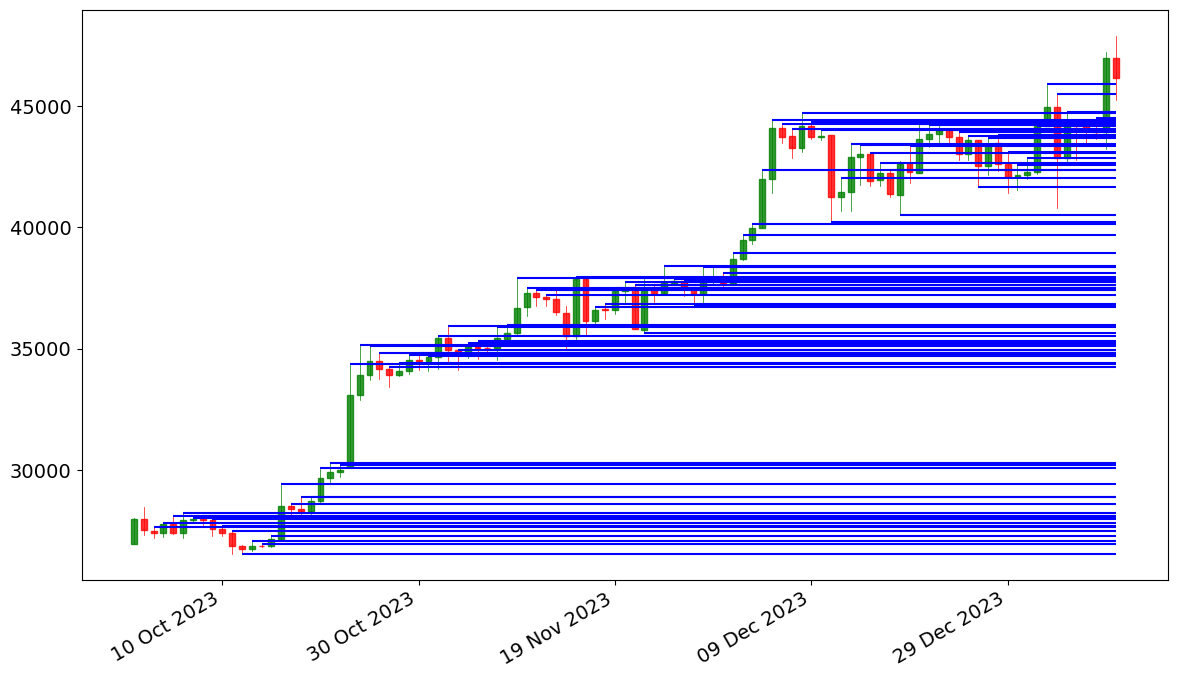

In [36]:
#Create two functions to identify if a level's support or resistance

#Support level function
def support(df, i):
    support = df['Low'][i] < df['Low'][i - 1] and df['Low'][i] < df['Low'][i + 1] and df['Low'][i + 1] < df['Low'][i + 2] and df['Low'][i - 1] < df['Low'][i - 2]
    return support

#Resistance level function
def resistance(df, i):
    support = df['High'][i] > df['High'][i - 1] and df['High'][i] > df['High'][i + 1] and df['High'][i + 1] > df['High'][i + 2] and df['High'][i - 1] > df['High'][i - 2]
    return resistance

#List of identified support and resistane levels through functions above
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):
    if support(df, i):
        levels.append((i, df['Low'][i]))
        level_types.append('Support')
    elif resistance(df, i):
            levels.append((i, df['High'][i]))
            level_types.append('Resistance')
            
def plot_levels():
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, df.values, width = 0.6, colorup = 'green', colordown = 'red', alpha = 0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.tight_layout()
    
    for level in levels:
        plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors = 'blue')
        fig.show()
        
plot_levels()

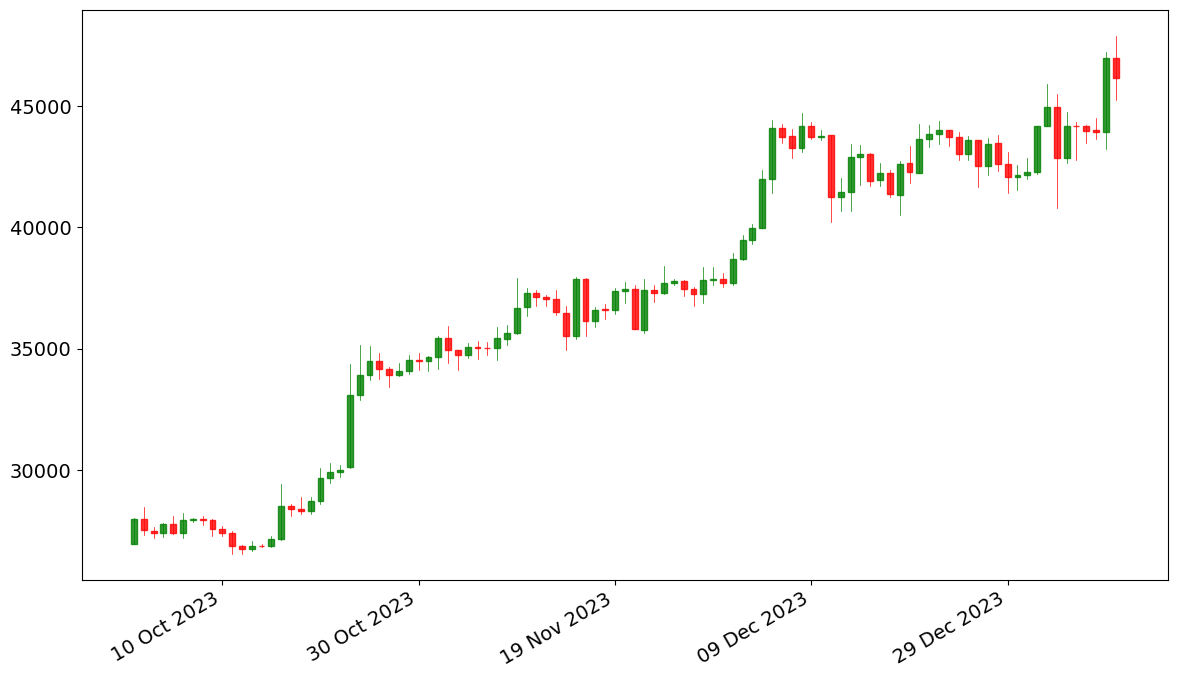

In [37]:
#Clean noise by discarding level if one level is close to another
#Closeness defined as being less than average size of a candle within the chart

mean = np.mean(df['High'] - df['Low'])

#Function returns true or false based on if too near a previously discovered level
def distance_from_level(x):
    return np.sum([abs(x-y) < mean for y in levels])

levels = []
level_types = []
for i in range(2, df.shape[0] - 2):
    if support(df, i):
        x = df['Low'][i]
        if distance_from_level(x):
            levels.append((i, x))
            level_types.append('Support')
    elif resistance(df, i):
        x = df['High'][i]
        if distance_from_level(x):
            levels.append((i, x))
            level_types.append('Resistance')

plot_levels()